In [176]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Exploratory Data Analysis (EDA)**

In [177]:
# Load and Display the Dataset

df = pd.read_csv('customer_purchase_data.csv')
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [178]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (1500, 9)


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [180]:
# Check for missing values
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


> We have 1500 rows with 9 features. All columns are non-null, meaning the dataset is clean and there are no missing values.  

> Additionally, all columns are numeric, so there is no need to encode text values. For example, gender is already represented numerically, and other categorical features like ProductCategory or LoyaltyProgram are also integers.

In [181]:
# Check for duplicates

print("Number of Duplicates:", df.duplicated().sum())

if df.duplicated().sum() > 0:
  dup_rows = df[df.duplicated(keep=False)]
  dup_rows_sorted = dup_rows.sort_values(list(df.columns))
  display(dup_rows_sorted)


Number of Duplicates: 112


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1139,18,1,111861.883084,5,2,31.027565,1,3,0
1150,18,1,111861.883084,5,2,31.027565,1,3,0
126,19,1,24590.476142,1,3,14.971058,0,5,0
774,19,1,24590.476142,1,3,14.971058,0,5,0
314,20,0,44443.215500,9,2,11.463730,1,0,0
...,...,...,...,...,...,...,...,...,...
961,70,0,119425.274117,4,3,45.355881,0,5,0
441,70,1,44197.666708,4,4,16.593685,1,4,0
749,70,1,44197.666708,4,4,16.593685,1,4,0
541,70,1,67880.238966,2,0,47.122010,0,2,0


In [182]:
# 8-number analysis

df.drop('PurchaseStatus', axis=1).describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000


**Bias and Distribution Analysis**

Identify potential **imbalances** that could affect model predictions, and guide preprocessing or evaluation strategies

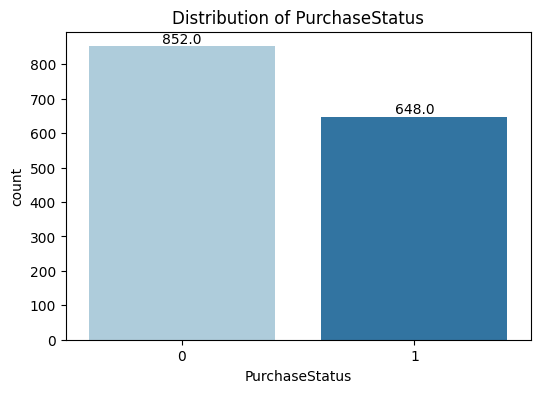

In [183]:
# Distribution of the target (PurchaseStatus) feature

plt.figure(figsize=(6,4))
ax = sns.countplot(x='PurchaseStatus', data=df, hue='PurchaseStatus', palette='Paired', legend=False)
plt.title('Distribution of PurchaseStatus')

# Annotate counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom')

plt.show()

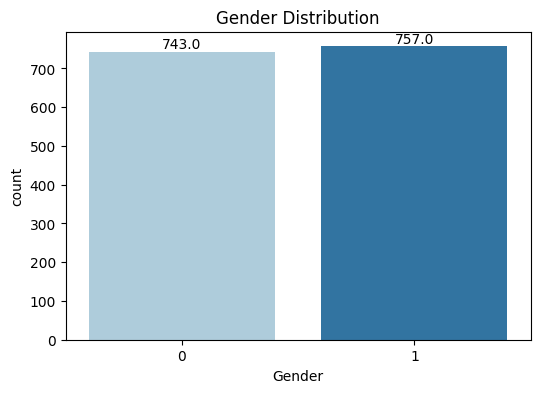

In [184]:
# Gender distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df, hue='Gender', palette='Paired', legend=False)
plt.title('Gender Distribution')

# Annotate counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom')

plt.show()

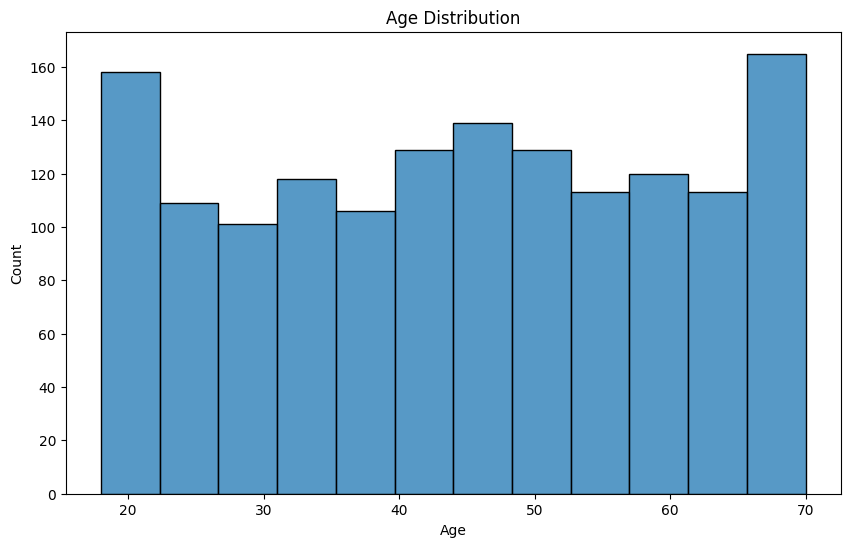

In [185]:
# Age distribution

# Calculate optimal bins using Sturges' rule
n = len(df['Age'])
k = int(np.ceil(np.log2(n) + 1))

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=k, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

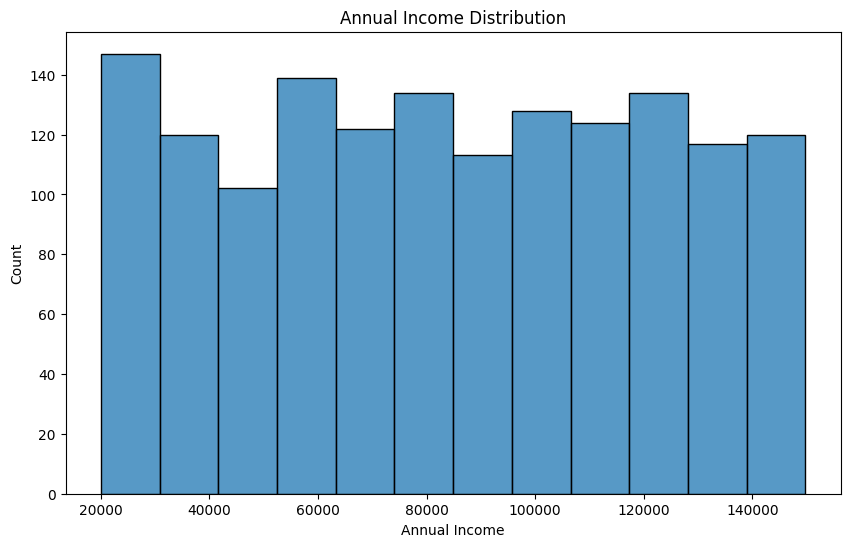

In [186]:
# Annual Income distribution

# Calculate optimal bins using Sturges' rule
n = len(df['AnnualIncome'])
k = int(np.ceil(np.log2(n) + 1))

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['AnnualIncome'], bins=k, kde=False)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

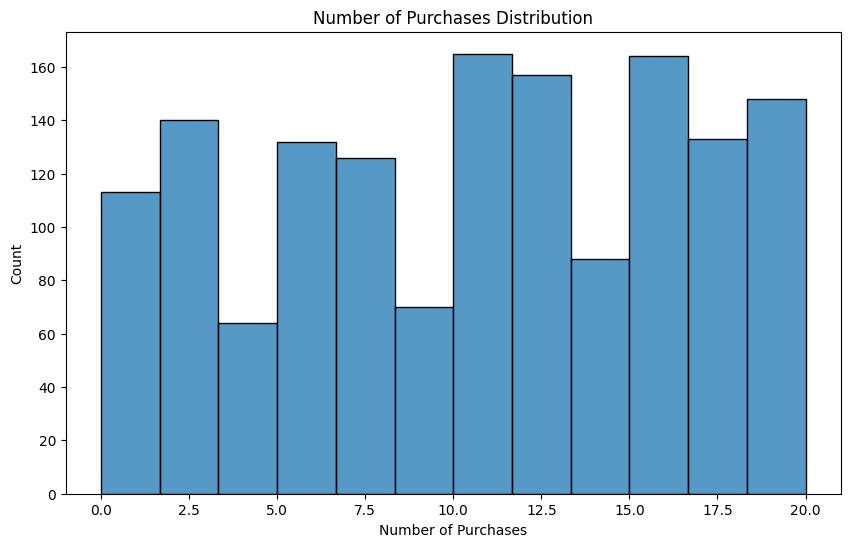

In [187]:
# Number of Purchases distribution

# Calculate optimal bins using Sturges' rule
n = len(df['NumberOfPurchases'])
k = int(np.ceil(np.log2(n) + 1))

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['NumberOfPurchases'], bins=k, kde=False)
plt.title('Number of Purchases Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Count')
plt.show()

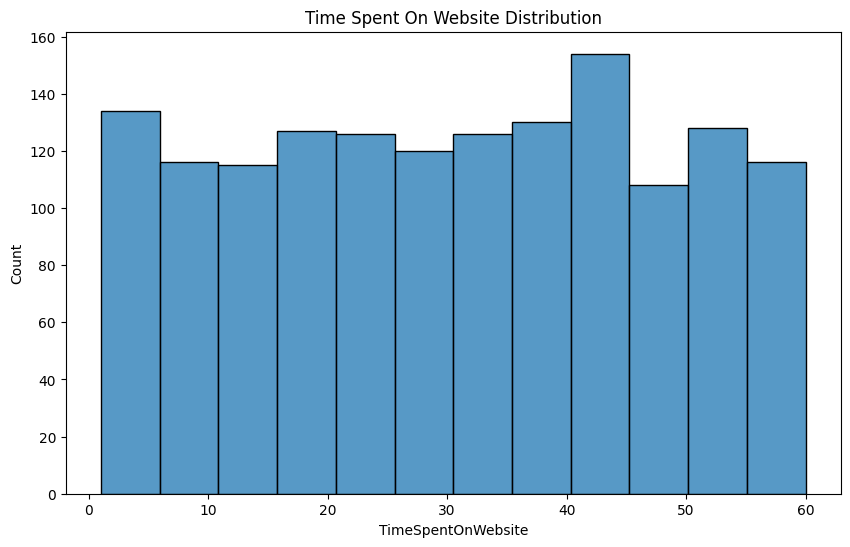

In [188]:
# Time Spent on Website distribution

# Calculate optimal bins using Sturges' rule
n = len(df['TimeSpentOnWebsite'])
k = int(np.ceil(np.log2(n) + 1))

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['TimeSpentOnWebsite'], bins=k, kde=False)
plt.title('Time Spent On Website Distribution')
plt.xlabel('TimeSpentOnWebsite')
plt.ylabel('Count')
plt.show()

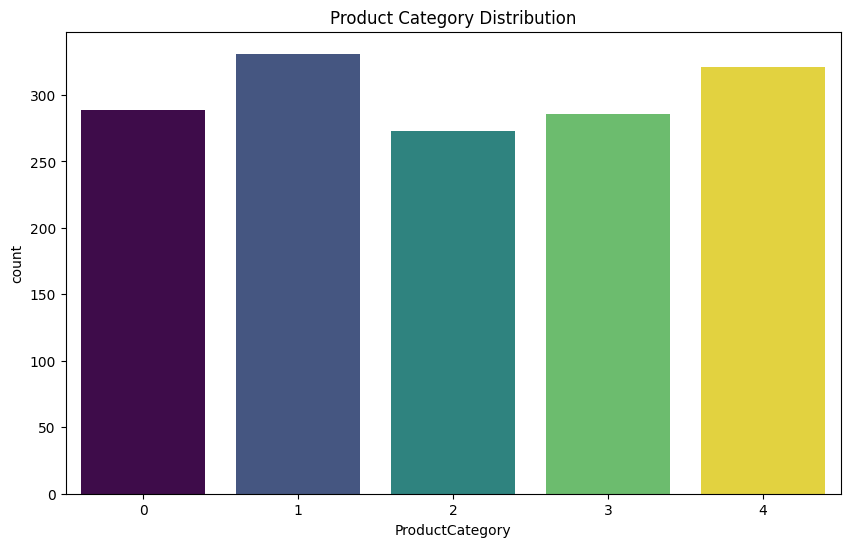

In [189]:
# Product Category distribution
plt.figure(figsize=(10,6))
sns.countplot(x='ProductCategory', data=df, hue='ProductCategory', palette='viridis', legend=False)
plt.title('Product Category Distribution')
plt.show()


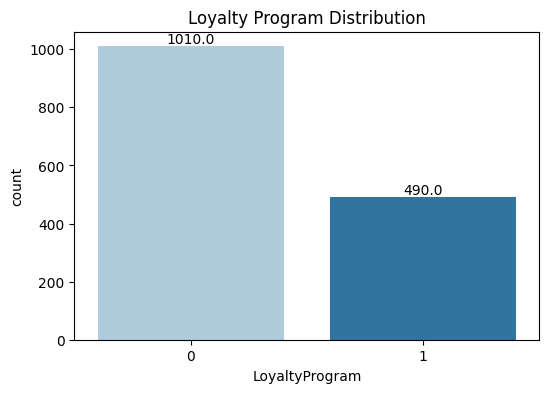

In [190]:
# Loyalty Program distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='LoyaltyProgram', data=df, hue='LoyaltyProgram', palette='Paired', legend=False)
plt.title('Loyalty Program Distribution')

# Annotate counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom')

plt.show()

> The dataset is relatively balanced for most features except for Loyalty Program where there is mild imbalance. If this feature shows high correlation with target variable (PurchaseStatus) then further steps may be needed during modeling to avoid potential bias.

**Feature-Target distribution analysis**

In [191]:
# Categorical features to check
categorical_features = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'DiscountsAvailed']

# Create crosstabs
for feature in categorical_features:
    ct = pd.crosstab(df[feature], df['PurchaseStatus'], normalize='index')

    print(f"\n{feature} vs PurchaseStatus")
    display(ct)


Gender vs PurchaseStatus


PurchaseStatus,0,1
Gender,,
0,0.569314,0.430686
1,0.566711,0.433289



ProductCategory vs PurchaseStatus


PurchaseStatus,0,1
ProductCategory,,
0,0.595156,0.404844
1,0.549849,0.450151
2,0.575092,0.424908
3,0.534965,0.465035
4,0.585670,0.414330



LoyaltyProgram vs PurchaseStatus


PurchaseStatus,0,1
LoyaltyProgram,,
0,0.675248,0.324752
1,0.346939,0.653061



DiscountsAvailed vs PurchaseStatus


PurchaseStatus,0,1
DiscountsAvailed,,
0,0.725000,0.275000
1,0.743802,0.256198
2,0.767932,0.232068
3,0.449057,0.550943
4,0.360465,0.639535
5,0.403101,0.596899


**Range and Magnitude Analysis**

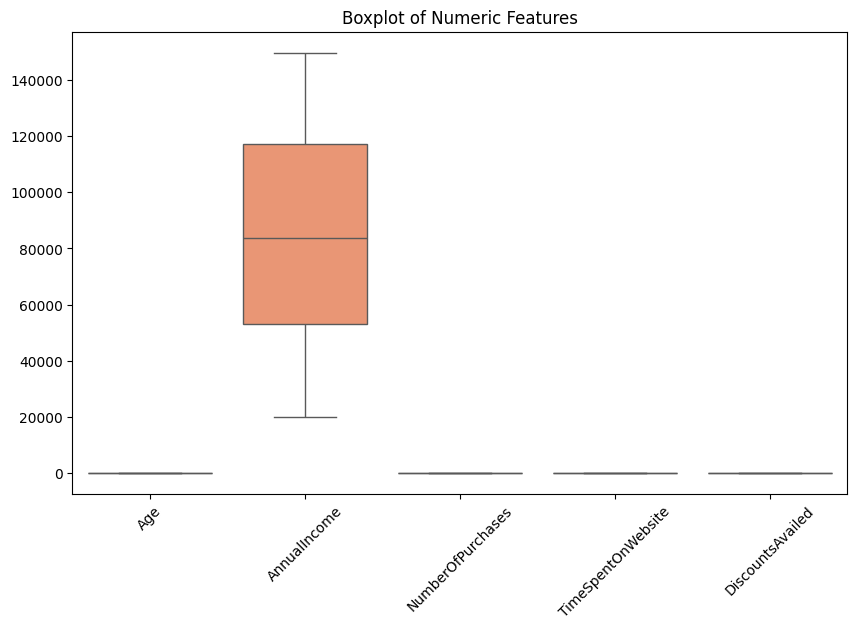

In [192]:
# Range and Magnitude

numeric_features = ['Age','AnnualIncome','NumberOfPurchases','TimeSpentOnWebsite','DiscountsAvailed']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_features], palette='Set2')
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

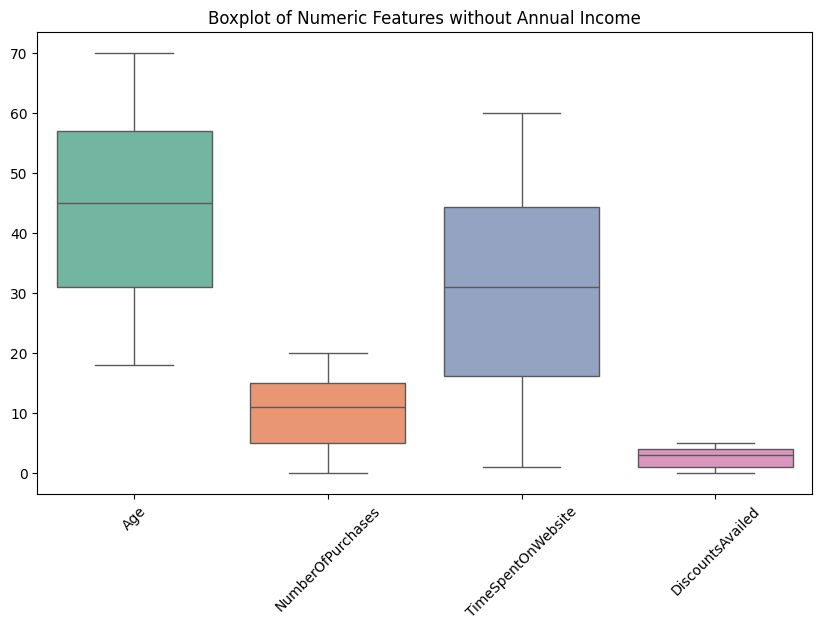

In [193]:
numeric_features_no_income = ['Age','NumberOfPurchases','TimeSpentOnWebsite','DiscountsAvailed']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_features_no_income], palette='Set2')
plt.title('Boxplot of Numeric Features without Annual Income')
plt.xticks(rotation=45)
plt.show()

> Features with large ranges and magnitudes, like `AnnualIncome`, can dominate the learning process in algorithms sensitive to scale. To ensure all features contribute proportionally to model training, it is recommended to scale numeric features under data pre-processing.

**Correlation**

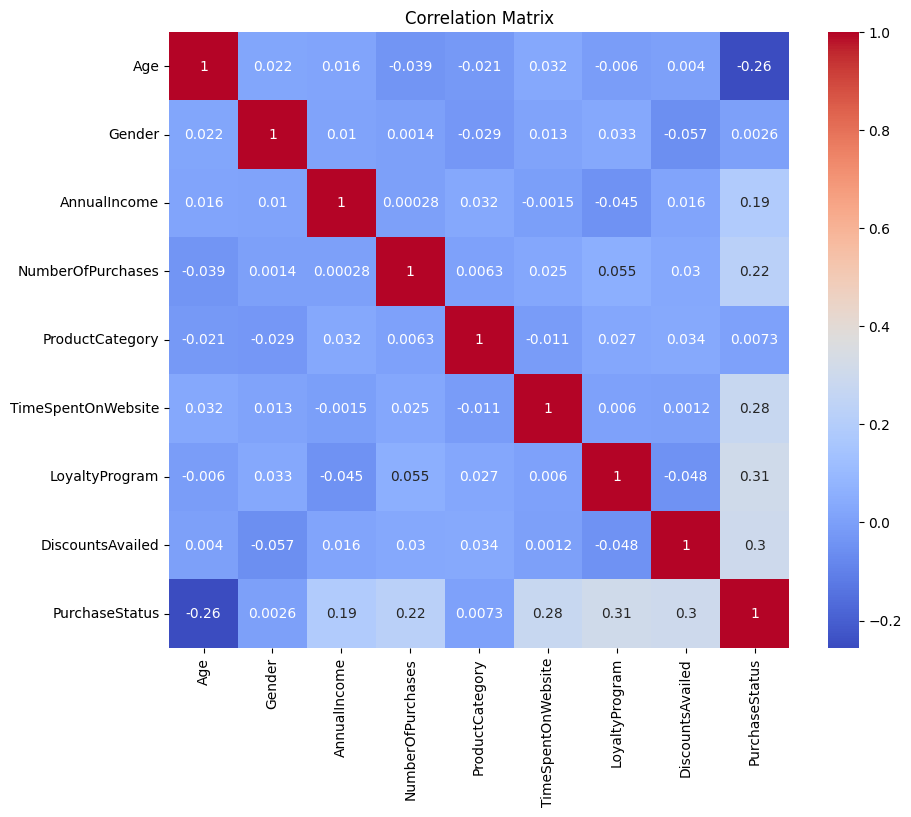

In [194]:
# Full correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

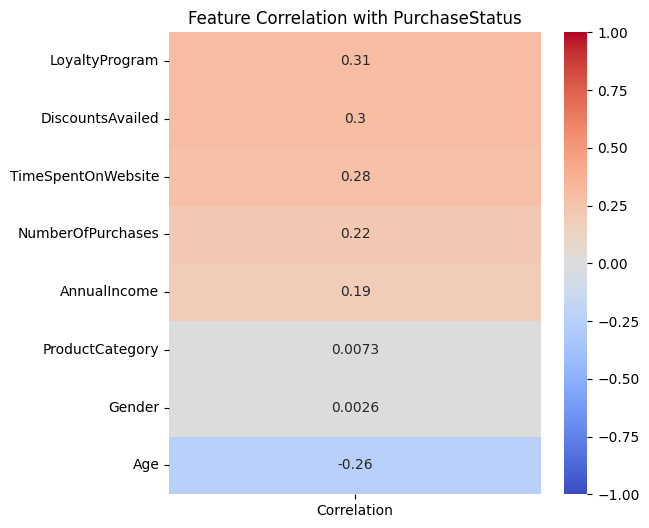

In [195]:
# Compute correlation with target
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

# Calculate correlation of each feature with the target
# Sort with absolute correlation
correlations_with_target = X.corrwith(y).sort_values(ascending=False)

corr_df = correlations_with_target.to_frame(name='Correlation')

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with PurchaseStatus')
plt.show()

> The LoyaltyProgram feature has the highest correlation with the target variable at 0.31, indicating a weak positive relationship.

> Although LoyaltyProgram shows a mild imbalance (0 = 1010, 1 = 490), the low correlation suggests this imbalance is unlikely to significantly bias the model.

**Data Preprocessing**

In [196]:
# Split the data into features and target variable
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [197]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [198]:
# All numeric columns in original X
all_columns = X.columns.tolist()

# Convert scaled array to DataFrame with all column names
X_scaled_df = pd.DataFrame(X_scaled, columns=all_columns)

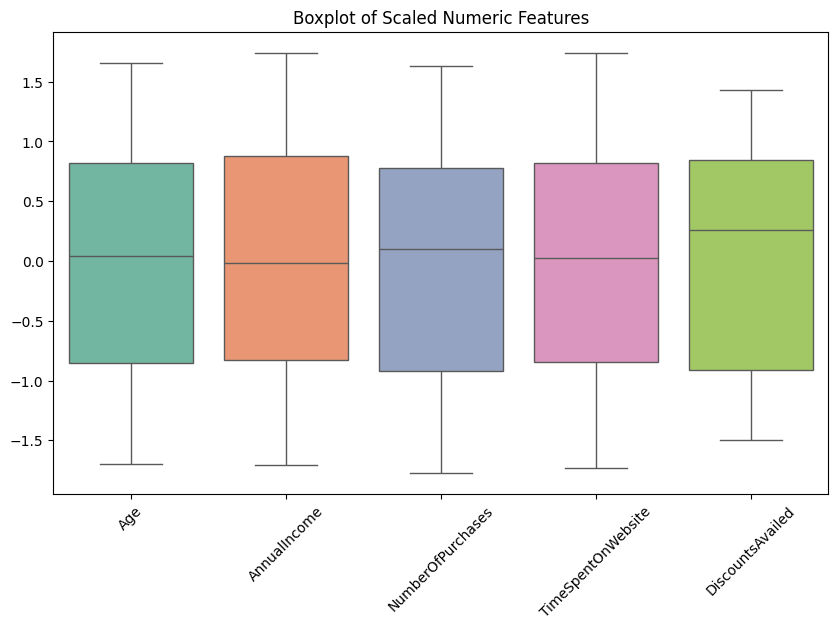

In [199]:
# Boxplot of scaled features

numeric_features = ['Age','AnnualIncome','NumberOfPurchases','TimeSpentOnWebsite','DiscountsAvailed']

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=X_scaled_df[numeric_features], palette='Set2')
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [200]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
  )

**ML Models**

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

In [202]:
# Evaluation function
def evaluate_model(y_true, y_pred, y_prob=None, model_name="Model"):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }
    # Display metrics in a DataFrame for clarity
    metrics_df = pd.DataFrame(metrics, index=[model_name])
    print(metrics_df)

    print("."*64)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    print("."*64)

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

Decision Tree

In [203]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [204]:
# Make predictions
y_pred_dt = dt_model.predict(x_test)
y_prob_dt = dt_model.predict_proba(x_test)[:, 1]

                          Accuracy  Precision    Recall  F1 Score
Decision Tree Classifier  0.856667    0.84252  0.823077  0.832685
................................................................


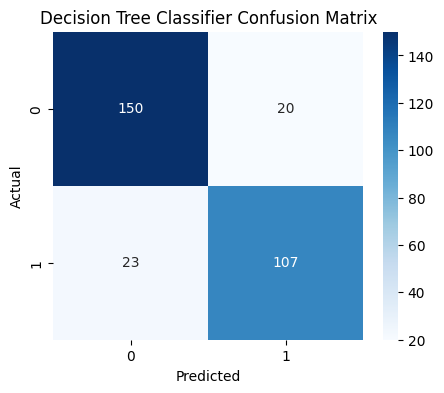

................................................................


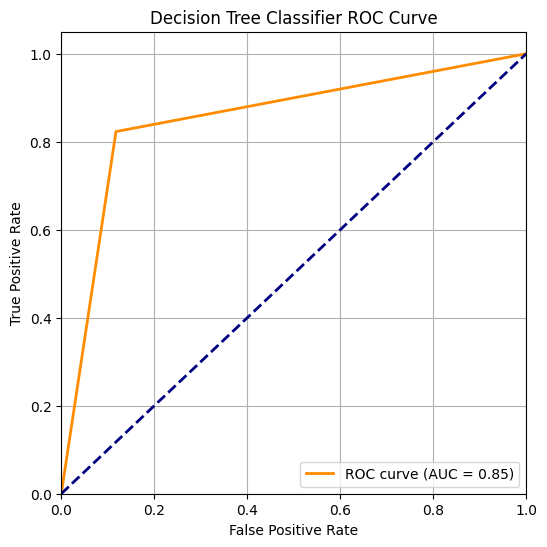

In [205]:
# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, y_prob=y_prob_dt, model_name="Decision Tree Classifier")

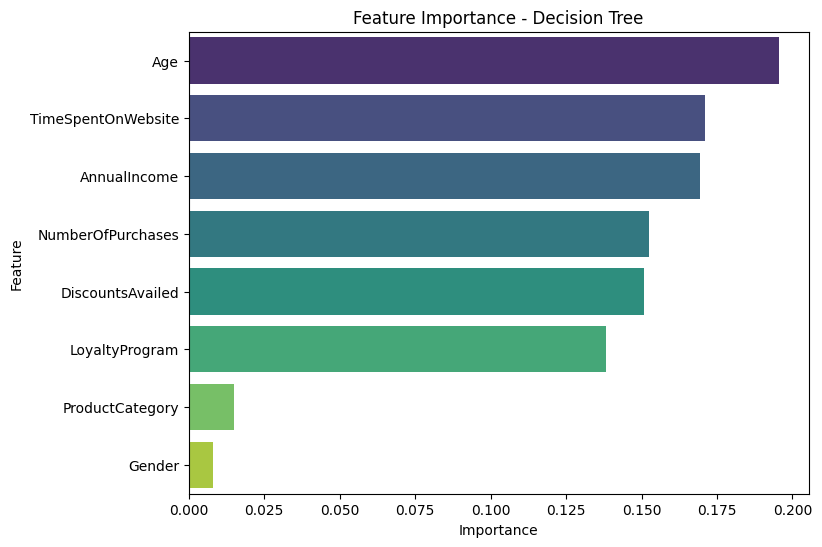

In [206]:
# Feature Importance
feature_importances = dt_model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, hue=features, palette='viridis', legend=False)
plt.title('Feature Importance - Decision Tree')
plt.show()

Random Forest

In [207]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
# Make predictions
y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

                          Accuracy  Precision    Recall  F1 Score
Random Forest Classifier      0.93   0.929134  0.907692  0.918288
................................................................


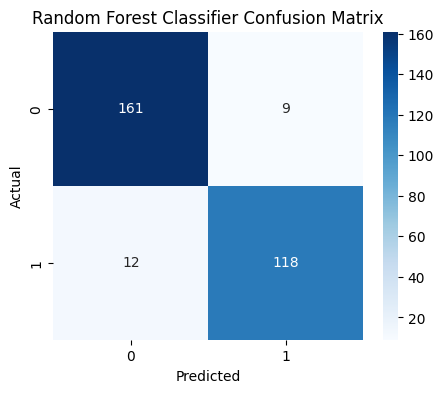

................................................................


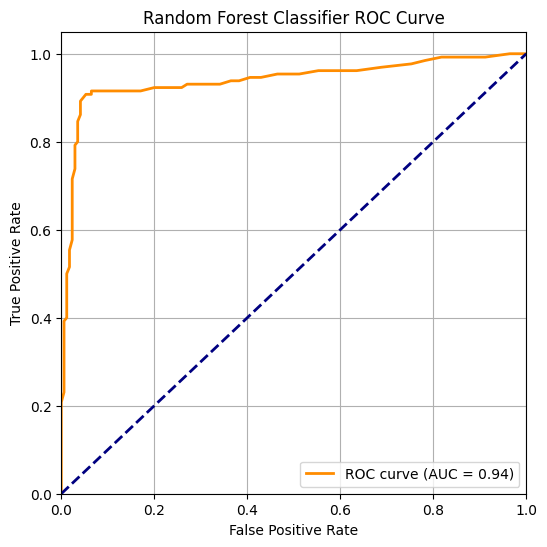

In [209]:
# Evaluate random Forest
evaluate_model(y_test, y_pred_rf, y_prob=y_prob_rf, model_name="Random Forest Classifier")

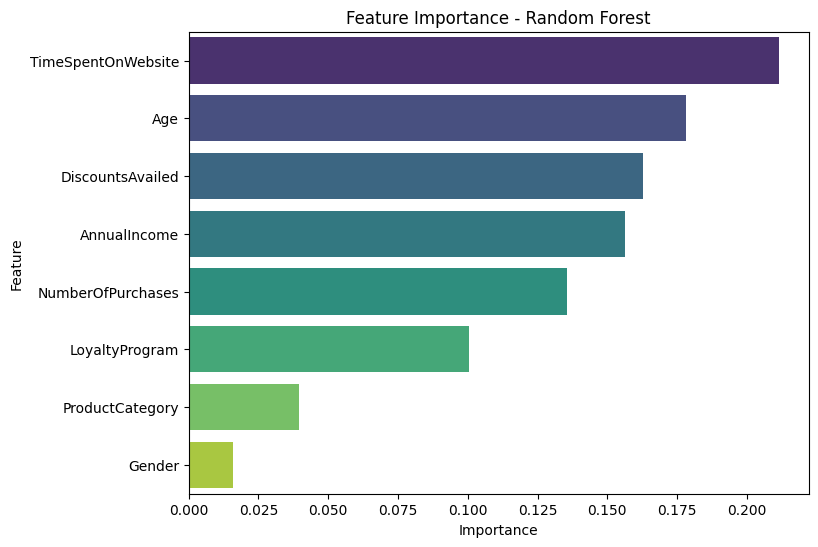

In [210]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=fi_df, hue=features, palette='viridis', legend=False)
plt.title('Feature Importance - Random Forest')
plt.show()

> Feature importance can differ between Decision Tree and Random Forest and may not align with simple correlation to the target. While correlation captures only linear relationships with the target, tree-based feature importance accounts for non-linear effects and interactions between features.

Logistic Regression

In [211]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [212]:
# Make Predictions

y_pred_lr = lr_model.predict(x_test)
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.826667      0.825  0.761538     0.792
................................................................


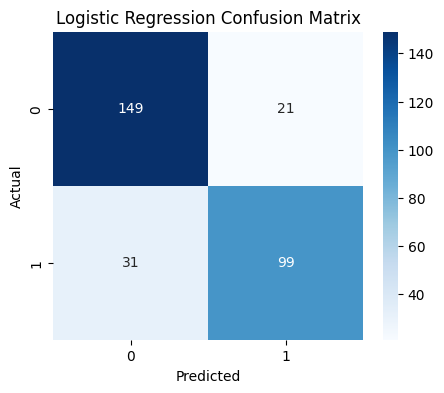

................................................................


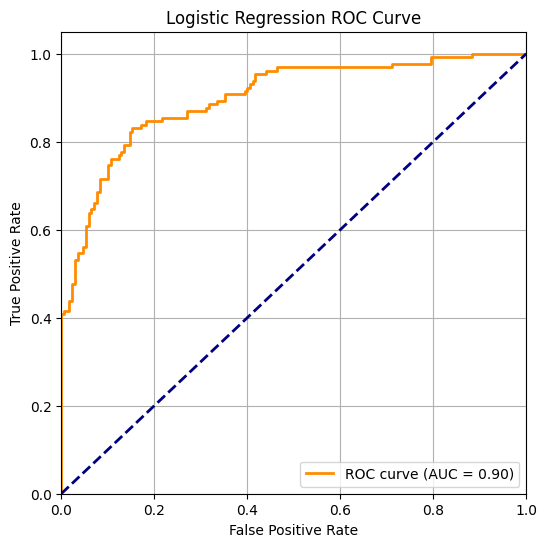

In [213]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, y_prob=y_prob_lr, model_name="Logistic Regression")